In [5]:
!pip install chart_studio


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
nb = pd.read_csv('C:/Users/sonin/OneDrive/Desktop/Projects/Stock_price_prediction/NSEBANK.csv')
nb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-16,39284.101563,39444.601563,39119.898438,39239.648438,39239.191406,0.0
1,2022-08-17,39351.300781,39504.500000,39202.800781,39461.699219,39461.242188,169800.0
2,2022-08-18,39324.398438,39703.699219,39291.148438,39656.148438,39655.687500,137200.0
3,2022-08-19,39732.648438,39759.148438,38848.398438,38985.949219,38985.496094,148100.0
4,2022-08-22,38693.648438,38732.851563,38247.250000,38297.750000,38297.304688,124300.0


In [8]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       247 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.6+ KB


In [9]:
nb['Date'] = pd.to_datetime(nb['Date'])

In [10]:
print(f'Dataframe contains stock price between {nb.Date.min()} {nb.Date.max()}')
print(f'Total days = {(nb.Date.max()- nb.Date.min()).days} days')

Dataframe contains stock price between 2022-08-16 00:00:00 2023-08-11 00:00:00
Total days = 360 days


In [11]:
nb.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,247,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,2023-02-12 11:27:56.113360384,42145.601452,42372.758654,41858.530520,42118.853849,42118.671558,7.521298e+06
min,2022-08-16 00:00:00,37660.000000,38283.398438,37386.351563,37647.750000,37647.312500,0.000000e+00
25%,2022-11-15 12:00:00,40558.449219,40818.486328,40294.898438,40614.136719,40614.018555,1.650500e+05
50%,2023-02-10 00:00:00,42329.375000,42503.474610,42044.349610,42263.875000,42263.875000,2.009000e+05
75%,2023-05-16 12:00:00,43761.962890,43974.525390,43487.648438,43695.386719,43695.386719,2.441000e+05
max,2023-08-11 00:00:00,46285.851563,46369.500000,45925.898438,46186.898438,46186.898438,1.798102e+09
std,NaN,2024.851242,1966.549522,2047.081581,2002.235457,2002.326030,1.146293e+08


<Axes: >

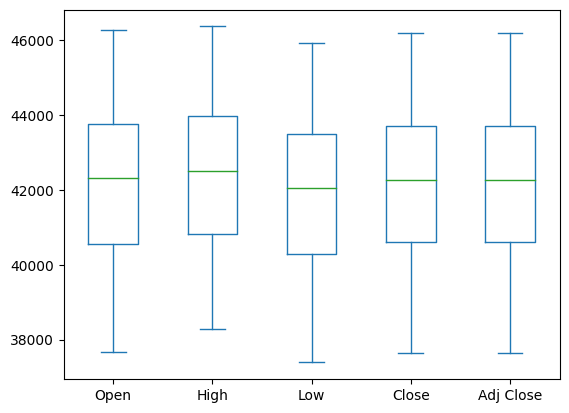

In [12]:
nb[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [13]:
#setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Nifty Bank',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
nb_data = [{'x':nb['Date'],'y':nb['Close']}]
plot=go.Figure(data=nb_data, layout=layout)

In [14]:
#plot(plot) #plottinf offline
iplot(plot)

In [15]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [17]:
#split the data into train and test sets
X= np.array(nb.index).reshape(-1,1)
Y= nb['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [18]:
#feature scaling
scaler = StandardScaler().fit(X_train)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#createing linear model
lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [21]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='predicted'
)
nb_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=nb_data, layout=layout)

In [22]:
iplot(plot2)